In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import pandas as pd
from sklearn.metrics import roc_curve, auc

## Data Preparation

In [2]:
# See the data-prep.py file for the data prepation.
# Run it.
# It will create four numpy array named train_X.npy, train_y.npy, test_X.npy and test_y.npy
# train_X -> training images with shape (32, 32) each
# train_y -> training label of images. label 0 for no (10,000), 1 for sphere (10,000) and  2 for vort (10,000)
# test_X -> testing images with shape (32, 32) each
# test_y -> testing label of images. label 0 for no (2,500), 1 for sphere (2,500) and  2 for vort (2,500)

## Load Data

In [3]:
# Load the data by np.load() method

In [4]:
train_X = np.load('train_X.npy')
train_y = np.load('train_y.npy')

test_X = np.load('test_X.npy')
test_y = np.load('test_y.npy')

In [5]:
# If you see the train_y or test_y, all the samples are not shuffled.
# So, we need to shuffle the data.

In [6]:
# This will shuffle the traininig data

train = list(zip(train_X, train_y))

random.shuffle(train)

train_X, train_y = zip(*train)

train_X = np.array(train_X)
train_y = np.array(train_y)

In [7]:
# This will shuffle the testing data

test = list(zip(test_X, test_y))

random.shuffle(test)

test_X, test_y = zip(*test)

test_X = np.array(test_X)
test_y = np.array(test_y)

In [8]:
# Now, the data is shuffled.

## Look Around Data

In [9]:
# Let's see the data

In [10]:
# Shape of the data

print(f' Shape of the training data: {train_X.shape}')
print(f' Shape of the training label: {train_y.shape}')
print(f' Shape of the testing data: {test_X.shape}')
print(f' Shape of the testing label: {test_y.shape}')

 Shape of the training data: (30000, 32, 32)
 Shape of the training label: (30000,)
 Shape of the testing data: (7500, 32, 32)
 Shape of the testing label: (7500,)


<AxesSubplot:>

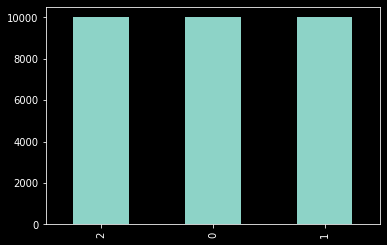

In [11]:
# Plot frequency of each class in training data

df = pd.DataFrame(train_y, columns=['label'])
df['label'].value_counts().plot(kind='bar')

<AxesSubplot:>

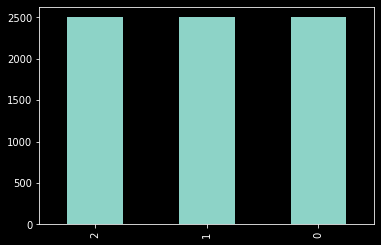

In [12]:
# Plot frequency of each class in testing data

df = pd.DataFrame(test_y, columns=['label'])
df['label'].value_counts().plot(kind='bar')

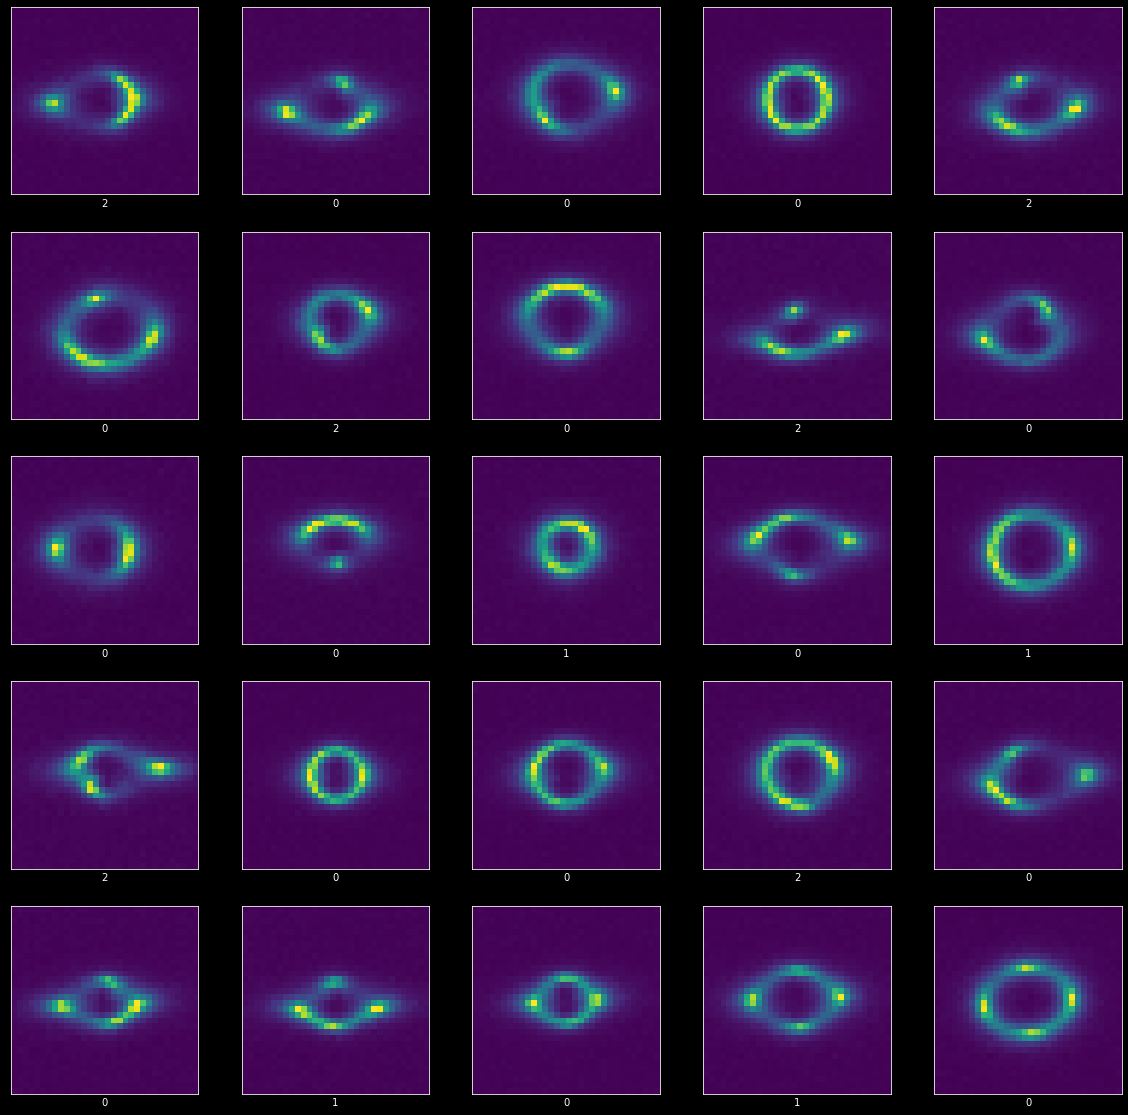

In [13]:
# 5 X 5 grid of images

plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i])
    plt.xlabel(train_y[i])
plt.show()

## Training and Testing

In [14]:
# Since this is an image classification problem, we should start wit a Convolutional Neural Network.
# But, I will start with a simple Dense Neural Network.

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 2,102,275
Trainable params: 2,102,275
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(train_X, train_y, epochs=300, validation_data=(test_X, test_y))

Epoch 1/300
938/938 [==============================] - 3s 3ms/step - loss: 1.1005 - accuracy: 0.3359 - val_loss: 1.0990 - val_accuracy: 0.3337
Epoch 2/300
938/938 [==============================] - 3s 3ms/step - loss: 1.0988 - accuracy: 0.3297 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 3/300
938/938 [==============================] - 3s 3ms/step - loss: 1.0985 - accuracy: 0.3431 - val_loss: 1.1003 - val_accuracy: 0.3325
Epoch 4/300
938/938 [==============================] - 3s 3ms/step - loss: 1.0983 - accuracy: 0.3428 - val_loss: 1.0981 - val_accuracy: 0.3425
Epoch 5/300
938/938 [==============================] - 3s 3ms/step - loss: 1.0980 - accuracy: 0.3418 - val_loss: 1.0983 - val_accuracy: 0.3385
Epoch 6/300
938/938 [==============================] - 3s 3ms/step - loss: 1.0978 - accuracy: 0.3390 - val_loss: 1.0989 - val_accuracy: 0.3421
Epoch 7/300
938/938 [==============================] - 3s 3ms/step - loss: 1.0975 - accuracy: 0.3422 - val_loss: 1.0978 - val_accuracy: 0.3417

In [21]:
loss, accuracy = model.evaluate(test_X, test_y)

235/235 [==============================] - 0s 2ms/step - loss: 1.0782 - accuracy: 0.4160


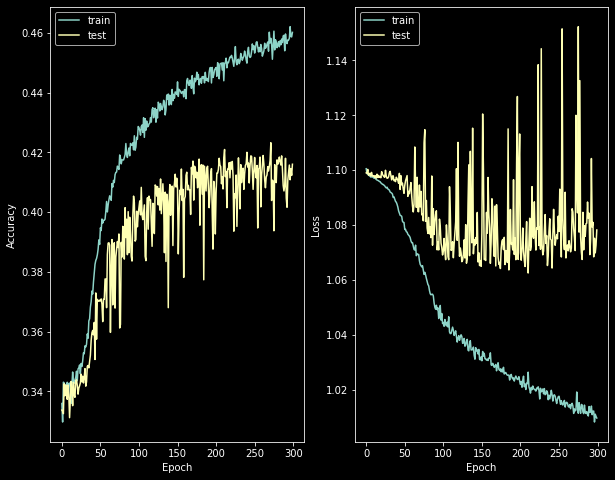

In [22]:
# Plot learning curve

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.show()


In [23]:
# Temporery prediction data for ROC Curve

prediction = model.predict(test_X)

for i in prediction:
    k = np.argmax(i)
    for j in range(len(i)):
        if j == k:
            i[j] = 1
        else:
            i[j] = 0

temp_test_y = []

for i in range(len(test_y)):
    a = [0, 0, 0]
    a[test_y[i]] = 1
    temp_test_y.append(a)

temp_test_y = np.array(temp_test_y)

In [24]:
model.save_weights('common-test-1-DNN.h5')

## Receiver Operating Characteristic Curve For Dense Neural Network Model

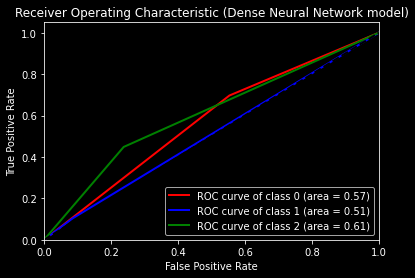

In [25]:
# ROC for Multi-class classification
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(temp_test_y[:, i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['red', 'blue', 'green']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
             
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Dense Neural Network model)')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Now let's create Convolutional Neural Network.

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(32, 32)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 32)             6176      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 32)           

In [29]:
history = model.fit(train_X, train_y, epochs=5, validation_data=(test_X, test_y))

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 1.0988 - accuracy: 0.3306 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 1.0987 - accuracy: 0.3292 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 1.0987 - accuracy: 0.3309 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 1.0987 - accuracy: 0.3301 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 1.0987 - accuracy: 0.3331 - val_loss: 1.0987 - val_accuracy: 0.3333


In [30]:
loss, accuracy = model.evaluate(test_X, test_y)

235/235 [==============================] - 1s 2ms/step - loss: 1.0987 - accuracy: 0.3333


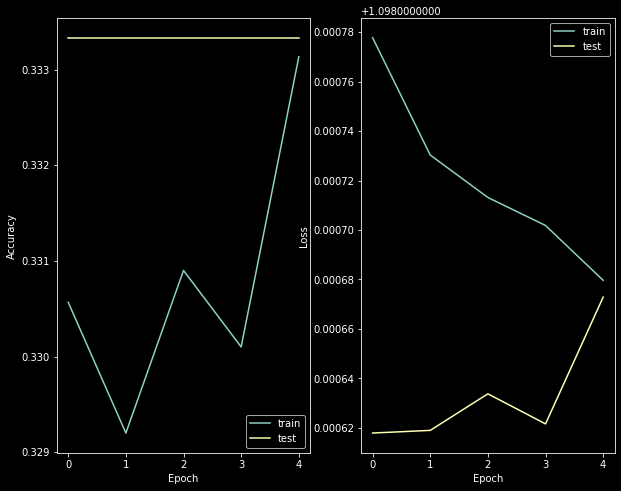

In [31]:
# Plot learning curve

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.show()


In [32]:
# Temporery prediction data for ROC Curve

prediction = model.predict(test_X)

for i in prediction:
    k = np.argmax(i)
    for j in range(len(i)):
        if j == k:
            i[j] = 1
        else:
            i[j] = 0

temp_test_y = []

for i in range(len(test_y)):
    a = [0, 0, 0]
    a[test_y[i]] = 1
    temp_test_y.append(a)

temp_test_y = np.array(temp_test_y)

## Receiver Operating Characteristic Curve For CNN Model

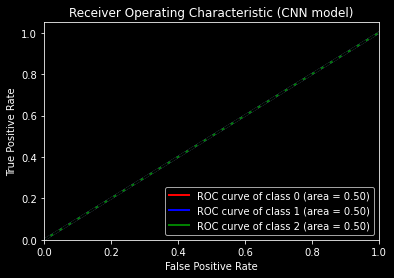

In [35]:
# ROC for Multi-class classification and CNN model
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(temp_test_y[:, i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['red', 'blue', 'green']

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
             
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (CNN model)')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Accuracy of CNN is very bad compared to DNN.
# So, ignoring it.

## Further Processing

In [37]:
# We can see that the accuracy is not satisfiable.
# So, we can try with a more complex CNN.
# Also, we can create the 3-color channel images and train the more complex CNN with them.
# We can use data augmentation.
# Further we can try pre-trained model like VGG16, VGG19, ResNet50, InceptionV3, MobileNet, etc. for 3-channel images.
# We can also use images with higher resolution.
# And training can be done on cloud resources.

#### Sahil Bharodiya
##### Email: sahilbharodiya.ppsv2@gmail.com
##### WhatsApp or Signal: +91 9173661451
##### LinkedIn: https://www.linkedin.com/in/sahil-bharodiya-5ab137202/